In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import random
import pickle
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from scipy.stats import loglaplace, lognorm, laplace, norm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.special import erf
warnings.filterwarnings('ignore')
sns.set(style="white", context="talk")
from matplotlib import rc

rc('text', usetex=True)
np.random.seed(42)

## S3.1 Numerical Computation of $\Omega$

In [39]:
θ = 2    # true state of the world
μ = np.linspace(-3,3,31)
σ = np.logspace(-1,1,21)


n_samples = 10000


n = 50

### Function Definitions

In [40]:
def signal_lognormal(n, m=1e-3, a = 1.0):
    # sample bias for each agent from a lognormal distribution
    # μ_normal is the mean of the underlying normal distribution. 
    # This function returns lognormal distributions that have a median m 
    # and variance a
    
    s = np.random.lognormal(mean= np.log(θ) + m ,sigma = a,size=n)
    return s

def signal_normal(n,θ, m=1e-3, a = 1.0):
    # sample bias for each agent from a lognormal distribution
    # μ_normal is the mean of the underlying normal distribution. 
    # This function returns lognormal distributions that have a median m 
    # and variance a
    
    s = np.abs(np.random.normal(loc=θ + m ,scale = a,size=n))
    return s

def signal_pareto(n, m=1e-3, a = 1.0):
    # sample bias for each agent from a lognormal distribution
    # μ_normal is the mean of the underlying normal distribution. 
    # This function returns lognormal distributions that have a median m 
    # and variance a
    
    s = (np.random.pareto(1/a, n) + 1) * (m+θ)
    return s

def signal_loglaplace(n, θ = 1.0, μ = 1.0, σ = 1):
    # sample bias for each agent from a lognormal distribution
    # μ_normal is the mean of the underlying normal distribution. 
    # This function returns lognormal distributions that have a median m 
    # and variance a
    
    s = np.exp(laplace.rvs(loc=np.log(θ) + μ,scale=σ,size=n))
    return s

# small w as defined in the paper
def w_star(n):
    w = 2*np.ones(n)/(3*n - 2)
    w[0] = n/(3*n - 2)
    return w

def w_cycle(n):
    w = np.ones(n)/n
    return w

### $\Omega$ simulation for log normal

In [41]:
##This is low resolution version of the main text Figure 2

Ω = np.zeros([len(μ),len(σ)])

w_star_ = w_star(n)
w_cycle_ = w_cycle(n)

for idx_n,μn in enumerate(μ):
    for idx_α,_α in enumerate(σ):
        for i in range(n_samples):
            s = signal_lognormal(n,m=μn,a=_α)

            star_MSE =  ((w_star_@s) - θ)**2
            cycle_MSE = ((w_cycle_@s) - θ)**2
            
            if star_MSE < cycle_MSE:
                Ω[idx_n,idx_α] += 1/n_samples

In [42]:
# This is an illustrative coarsed figure. The high resolution one is in "Fig2.Linking task features and network structure.ipynb"
μμ, σσ = np.meshgrid(μ, σ)
sigma = 1 # this is a lower sigma than what we used in the main text figure (i.e., main text used further smoothing and more fine-grained steps)
data = gaussian_filter(Ω.T, sigma)

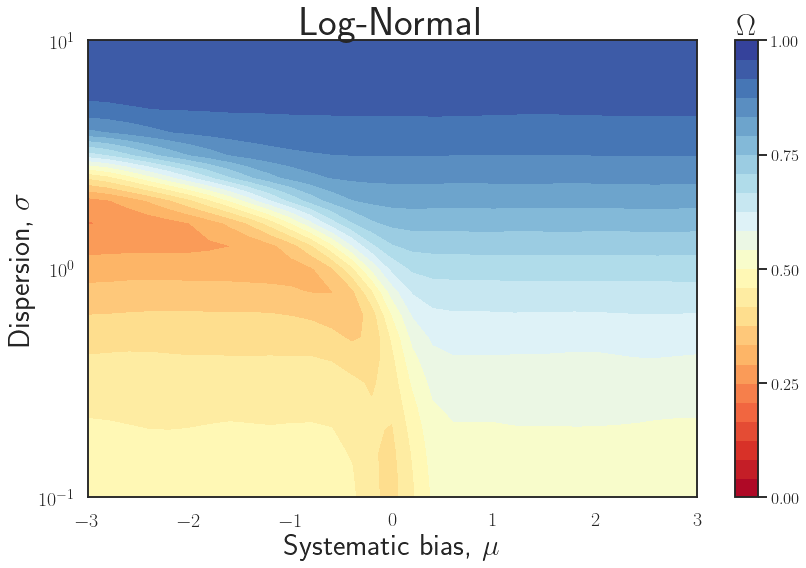

In [43]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_yscale('log',basey=10)


main_cs = ax.contourf(μμ,σσ,data,levels=np.linspace(0,1,25),cmap='RdYlBu')
clb = fig.colorbar(main_cs, ticks=np.linspace(0,1,5))
clb.ax.set_title(r"$\Omega$",fontsize=30)

ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)

ax.set_ylim(0.1,10)

ax.tick_params(labelsize=20)

ax.set_title("Log-Normal",fontsize=40)

plt.tight_layout()
plt.savefig('fig2_phase_diagram_v2.pdf', bbox_inches='tight')

### $\Omega$ simulation for gaussian

In [44]:
##This is low resolution version of the main text Figure 2

Ω = np.zeros([len(μ),len(σ)])

w_star_ = w_star(n)
w_cycle_ = w_cycle(n)

for idx_n,μn in enumerate(μ):
    for idx_α,_α in enumerate(σ):
        for i in range(n_samples):
            s = signal_normal(n,θ,m=μn,a=_α)

            star_MSE =  ((w_star_@s) - θ)**2
            cycle_MSE = ((w_cycle_@s) - θ)**2
            
            if star_MSE < cycle_MSE:
                Ω[idx_n,idx_α] += 1/n_samples

In [45]:
# This is an illustrative coarsed figure. The high resolution one is in "Fig2.Linking task features and network structure.ipynb"
μμ, σσ = np.meshgrid(μ, σ)
sigma = 1 # this is a lower sigma than what we used in the main text figure (i.e., main text used further smoothing and more fine-grained steps)
data = gaussian_filter(Ω.T, sigma)

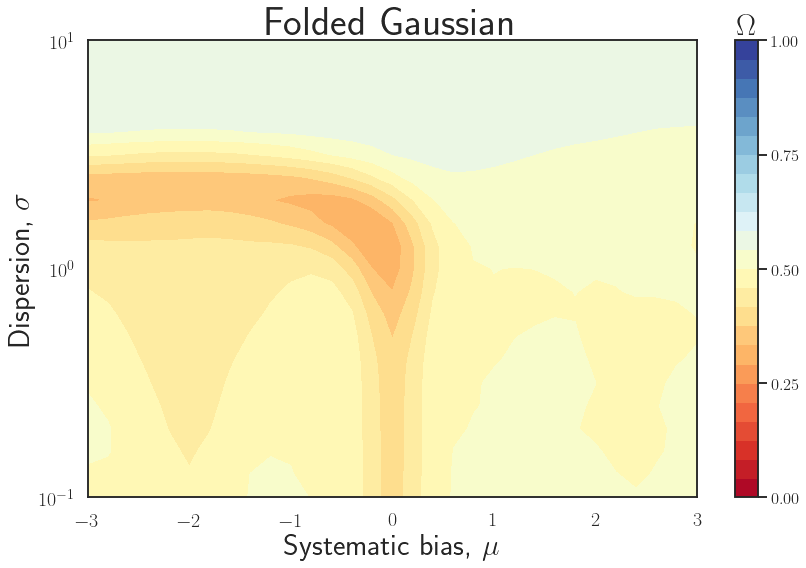

In [46]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_yscale('log',basey=10)


main_cs = ax.contourf(μμ,σσ,data,levels=np.linspace(0,1,25),cmap='RdYlBu')
clb = fig.colorbar(main_cs, ticks=np.linspace(0,1,5))
clb.ax.set_title(r"$\Omega$",fontsize=30)

ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)

ax.set_ylim(0.1,10)

ax.tick_params(labelsize=20)

ax.set_title("Folded Gaussian",fontsize=40)

plt.tight_layout()
plt.savefig('fig2_phase_diagram_foldedgaussian.pdf', bbox_inches='tight')

### $\Omega$ simulation for power law

In [47]:
##This is low resolution version of the main text Figure 2

Ω = np.zeros([len(μ),len(σ)])

w_star_ = w_star(n)
w_cycle_ = w_cycle(n)

for idx_n,μn in enumerate(μ):
    for idx_α,_α in enumerate(σ):
        for i in range(n_samples):
            s = signal_pareto(n,m=μn,a=_α)

            star_MSE =  ((w_star_@s) - θ)**2
            cycle_MSE = ((w_cycle_@s) - θ)**2
            
            if star_MSE < cycle_MSE:
                Ω[idx_n,idx_α] += 1/n_samples

In [48]:
# This is an illustrative coarsed figure. The high resolution one is in "Fig2.Linking task features and network structure.ipynb"
μμ, σσ = np.meshgrid(μ, σ)
sigma = 1 # this is a lower sigma than what we used in the main text figure (i.e., main text used further smoothing and more fine-grained steps)
data = gaussian_filter(Ω.T, sigma)

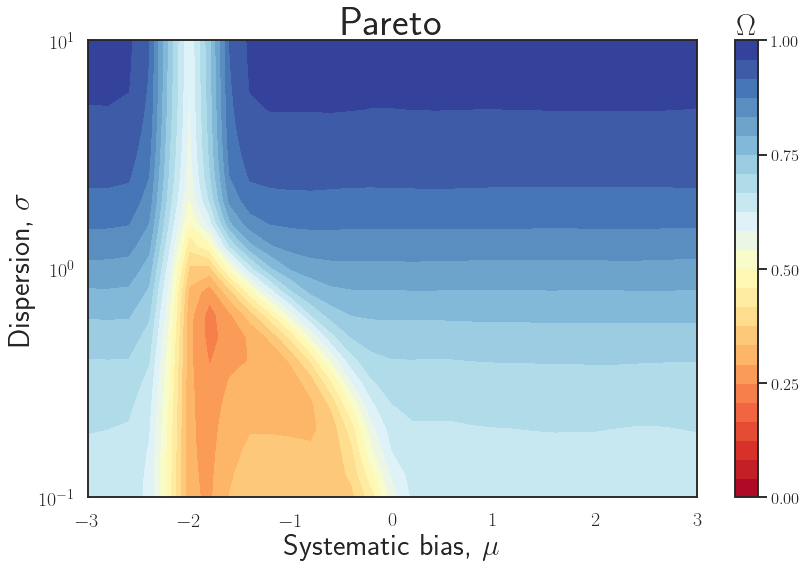

In [49]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_yscale('log',basey=10)


main_cs = ax.contourf(μμ,σσ,data,levels=np.linspace(0,1,25),cmap='RdYlBu')
clb = fig.colorbar(main_cs, ticks=np.linspace(0,1,5))
clb.ax.set_title(r"$\Omega$",fontsize=30)

ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)

ax.set_ylim(0.1,10)

ax.tick_params(labelsize=20)

ax.set_title("Pareto",fontsize=40)

plt.tight_layout()
plt.savefig('fig2_phase_diagram_pareto.pdf', bbox_inches='tight')

### $\Omega$ simulation for loglaplace

In [50]:
##This is low resolution version of the main text Figure 2

Ω = np.zeros([len(μ),len(σ)])

w_star_ = w_star(n)
w_cycle_ = w_cycle(n)

for idx_n,μn in enumerate(μ):
    for idx_α,_α in enumerate(σ):
        for i in range(n_samples):
            s = signal_loglaplace(n,θ = θ,μ=μn,σ=_α)

            star_MSE =  ((w_star_@s) - θ)**2
            cycle_MSE = ((w_cycle_@s) - θ)**2
            
            if star_MSE < cycle_MSE:
                Ω[idx_n,idx_α] += 1/n_samples

In [51]:
# This is an illustrative coarsed figure. The high resolution one is in "Fig2.Linking task features and network structure.ipynb"
μμ, σσ = np.meshgrid(μ, σ)
sigma = 1 # this is a lower sigma than what we used in the main text figure (i.e., main text used further smoothing and more fine-grained steps)
data = gaussian_filter(Ω, sigma)

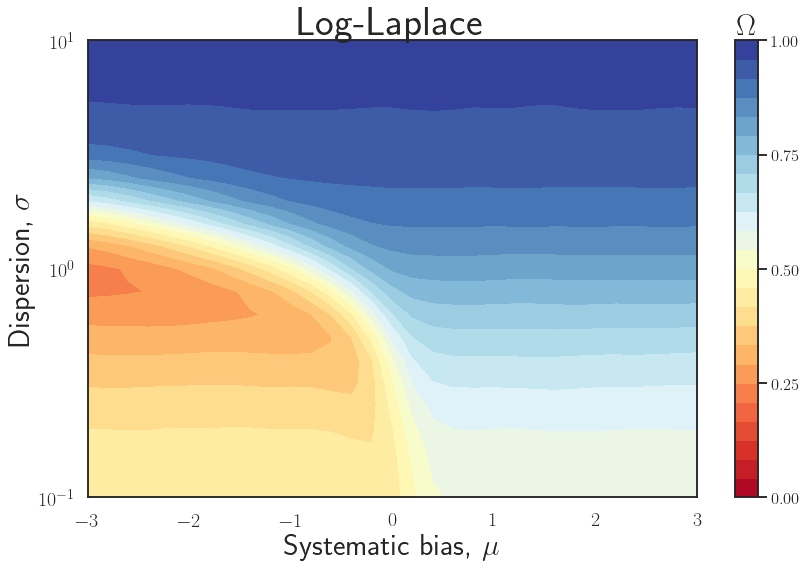

In [52]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_yscale('log',basey=10)


main_cs = ax.contourf(μμ,σσ,data.T,levels=np.linspace(0,1,25),cmap='RdYlBu')
clb = fig.colorbar(main_cs, ticks=np.linspace(0,1,5))
clb.ax.set_title(r"$\Omega$",fontsize=30)

ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)

ax.set_ylim(0.1,10)

ax.tick_params(labelsize=20)

ax.set_title("Log-Laplace",fontsize=40)

plt.tight_layout()
plt.savefig('fig2_phase_diagram_loglaplace.pdf', bbox_inches='tight')

### Loss Functions

In [16]:
μ = np.linspace(-3,3,11)
σ = np.logspace(-1,1,11)

n_samples = 10000


n = 50

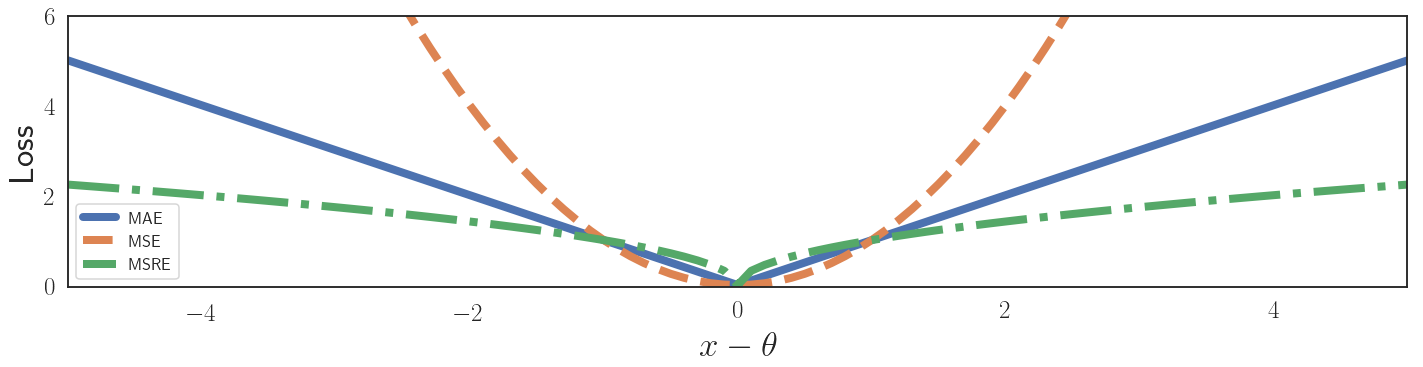

In [17]:
error = np.linspace(-5,5,101)

fig = plt.figure(figsize=(8*3,5))
ax = fig.add_subplot(111)

ax.plot(error, np.abs(error), linestyle='-', linewidth=8, label='MAE')
ax.plot(error, np.abs(error)**2, linestyle='--', linewidth=8,label='MSE')
ax.plot(error, np.sqrt(np.abs(error)), linestyle='-.',linewidth=8,label='MSRE')
ax.set_ylim(-0.05,6)
ax.set_xlim(-5,5)
ax.set_xlabel(r"$x-\theta$",fontsize=35)
ax.set_ylabel("Loss",fontsize=35)

ax.tick_params(labelsize=25)


ax.legend()
plt.savefig('SI_loss.pdf', bbox_inches='tight')

### Mean Square Error

In [18]:

MSE_star = np.zeros([len(μ),len(σ)])
MSE_cycle = np.zeros([len(μ),len(σ)])


w_star_ = w_star(n)
w_cycle_ = w_cycle(n)

for idx_n,μn in enumerate(μ):
    for idx_α,_α in enumerate(σ):
        for i in range(n_samples):
            s = signal_lognormal(n,m=μn,a=_α)

            star_MSE =  ((w_star_@s) - θ)**2
            cycle_MSE = ((w_cycle_@s) - θ)**2
            
            MSE_star[idx_n,idx_α] += star_MSE/n_samples
            MSE_cycle[idx_n,idx_α] += cycle_MSE/n_samples

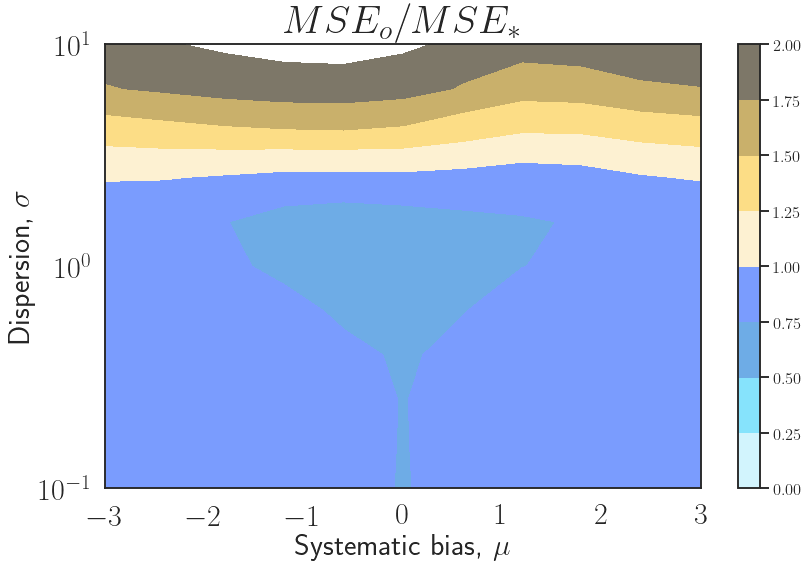

In [19]:

# Plot
sigma = 1.25
data = gaussian_filter(MSE_cycle.T/MSE_star.T, sigma)
μμ, σσ = np.meshgrid(μ, σ)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_yscale('log',basey=10)

levels = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
colors = ["#D2F4FD","#86E3FC", "#6EACE6", "#7A9CFE", 
          "#FDF1D2", "#FCDD86", "#C9B06B", "#7D7768"
         ]
## The body of the plot
main_cs = ax.contourf(μμ,σσ,data,levels=levels,colors=colors)

#the color bar
cbar = fig.colorbar(main_cs)

#label the color bar
ax.set_title(r"$MSE_{o}/MSE_{*}$",fontsize=40)

##Label the body of the plot
ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)
#ax.set_title(r"$L(x-\theta) = |x-\theta|^2$",fontsize=30)


ax.tick_params(labelsize=30)

plt.tight_layout()
plt.savefig('SI_MSE.pdf', bbox_inches='tight')

### Mean Absolute Error

In [26]:

MAE_star = np.zeros([len(μ),len(σ)])
MAE_cycle = np.zeros([len(μ),len(σ)])

w_star_ = w_star(n)
w_cycle_ = w_cycle(n)

for idx_n,μn in enumerate(μ):
    for idx_α,_α in enumerate(σ):
        for i in range(n_samples):
            s = signal_lognormal(n,m=μn,a=_α)

            star_MAE =  np.abs((w_star_@s) - θ)
            cycle_MAE = np.abs((w_cycle_@s) - θ)
            
            MAE_star[idx_n,idx_α] += star_MAE/n_samples
            MAE_cycle[idx_n,idx_α] += cycle_MAE/n_samples


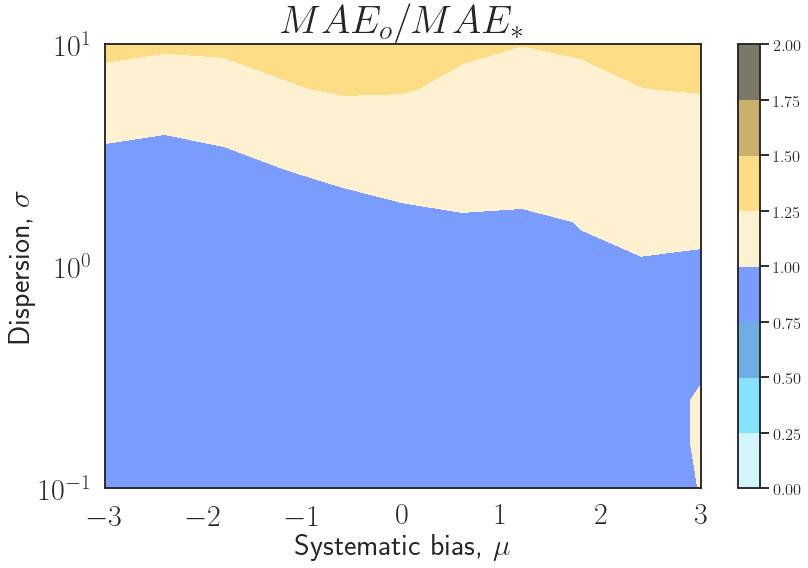

In [27]:
# Plot
sigma = 1.25
data = gaussian_filter(MAE_cycle.T/MAE_star.T, sigma)
μμ, σσ = np.meshgrid(μ, σ)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_yscale('log',basey=10)

levels = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
colors = ["#D2F4FD","#86E3FC", "#6EACE6", "#7A9CFE", 
          "#FDF1D2", "#FCDD86", "#C9B06B", "#7D7768"
         ]
## The body of the plot
main_cs = ax.contourf(μμ,σσ,data,levels=levels,colors=colors)

#the color bar
cbar = fig.colorbar(main_cs)

#label the color bar
ax.set_title(r"$MAE_{o}/MAE_{*}$",fontsize=40)

##Label the body of the plot
ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)
#ax.set_title(r"$L(x-\theta) = |x-\theta|^2$",fontsize=30)


ax.tick_params(labelsize=30)

plt.tight_layout()
plt.savefig('SI_MAE.pdf', bbox_inches='tight')

### Mean Square Root Error

In [22]:
MSRE_star = np.zeros([len(μ),len(σ)])
MSRE_cycle = np.zeros([len(μ),len(σ)])

w_star_ = w_star(n)
w_cycle_ = w_cycle(n)

for idx_n,μn in enumerate(μ):
    for idx_α,_α in enumerate(σ):
        for i in range(n_samples):
            s = signal_lognormal(n,m=μn,a=_α)

            star_MSRE =  np.sqrt(np.abs((w_star_@s) - θ))
            cycle_MSRE = np.sqrt(np.abs((w_cycle_@s) - θ))
            
            MSRE_star[idx_n,idx_α] += star_MSRE/n_samples
            MSRE_cycle[idx_n,idx_α] += cycle_MSRE/n_samples

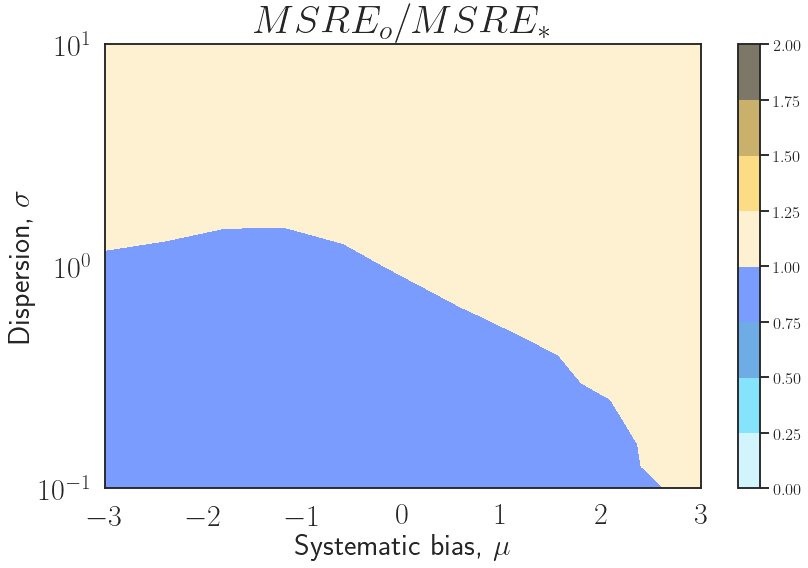

In [25]:
# Plot
sigma = 1.25
data = gaussian_filter(MSRE_cycle.T/MSRE_star.T, sigma)
μμ, σσ = np.meshgrid(μ, σ)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_yscale('log',basey=10)

levels = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
colors = ["#D2F4FD","#86E3FC", "#6EACE6", "#7A9CFE", 
          "#FDF1D2", "#FCDD86", "#C9B06B", "#7D7768"
         ]
## The body of the plot
main_cs = ax.contourf(μμ,σσ,data,levels=levels,colors=colors)

#the color bar
cbar = fig.colorbar(main_cs)

#label the color bar
ax.set_title(r"$MSRE_{o}/MSRE_{*}$",fontsize=40)

##Label the body of the plot
ax.set_xlabel("Systematic bias, $\mu$",fontsize=30)
ax.set_ylabel('Dispersion, $\sigma$',fontsize=30)
#ax.set_title(r"$L(x-\theta) = |x-\theta|^2$",fontsize=30)


ax.tick_params(labelsize=30)

plt.tight_layout()
plt.savefig('SI_MSRE.pdf', bbox_inches='tight')